In [ ]:
# import delle librerie necessarie
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# import delle librerie per la normalizzazione
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [21]:
# caricare il dataset
df = pd.read_csv("/home/endershade/Desktop/Python_Course_Repo/lesson_24_mon_05_may/cause_of_deaths.csv")
# esplorazione iniziale del dataset
print(df.head())
print(df.info())
print(df.isnull().sum())


  Country/Territory Code  Year  Meningitis  \
0       Afghanistan  AFG  1990        2159   
1       Afghanistan  AFG  1991        2218   
2       Afghanistan  AFG  1992        2475   
3       Afghanistan  AFG  1993        2812   
4       Afghanistan  AFG  1994        3027   

   Alzheimer's Disease and Other Dementias  Parkinson's Disease  \
0                                     1116                  371   
1                                     1136                  374   
2                                     1162                  378   
3                                     1187                  384   
4                                     1211                  391   

   Nutritional Deficiencies  Malaria  Drowning  Interpersonal Violence  ...  \
0                      2087       93      1370                    1538  ...   
1                      2153      189      1391                    2001  ...   
2                      2441      239      1514                    2299  ...   
3   

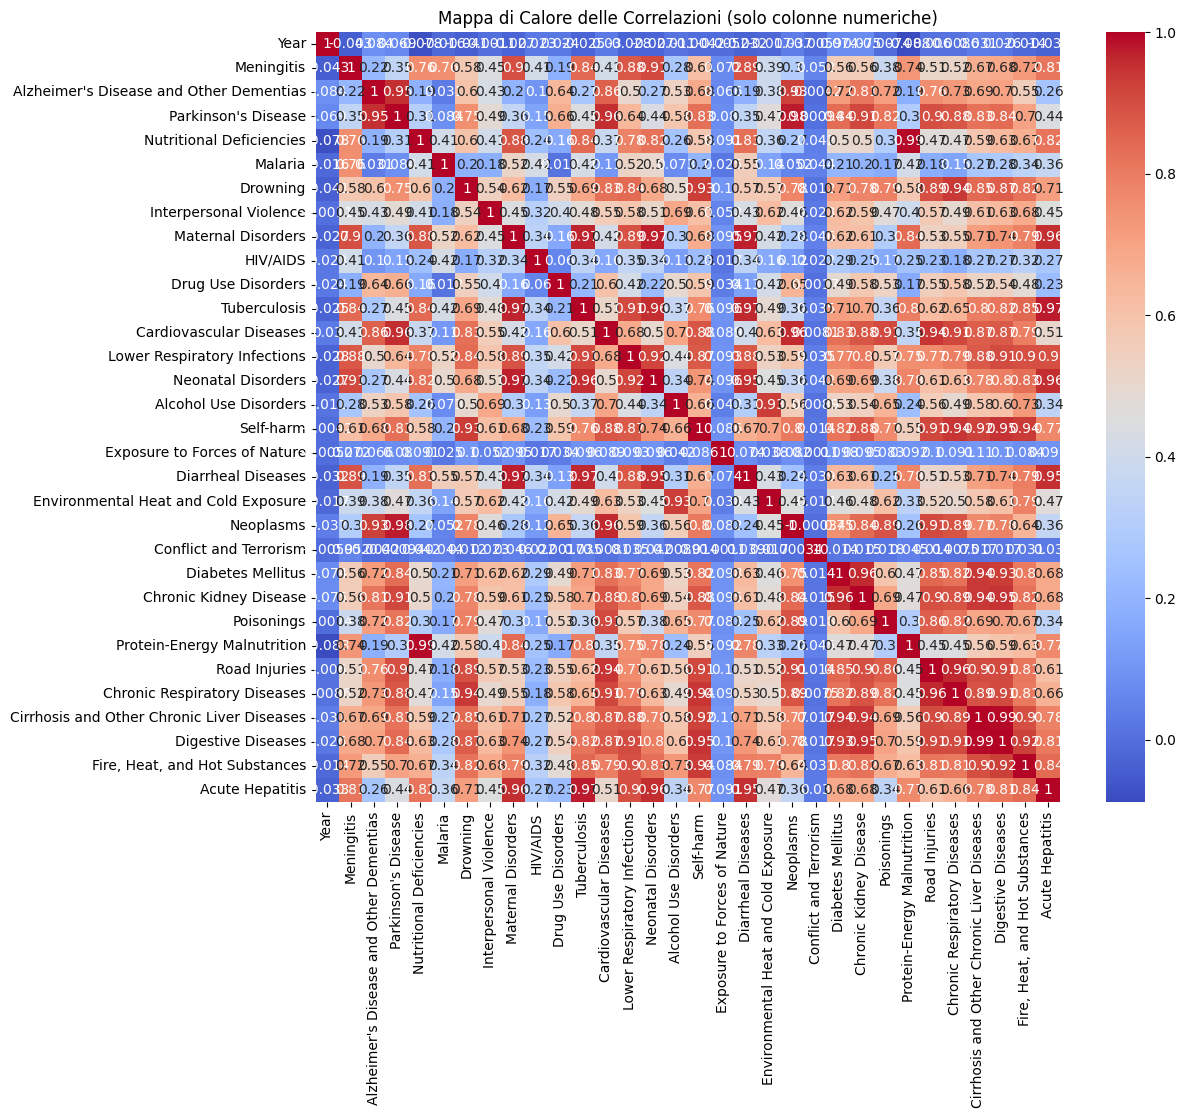

In [18]:
# Seleziona solo le colonne numeriche
df_numeric = df.select_dtypes(include='number')

# Calcola e visualizza la matrice di correlazione
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Mappa di Calore delle Correlazioni (solo colonne numeriche)')
plt.show()

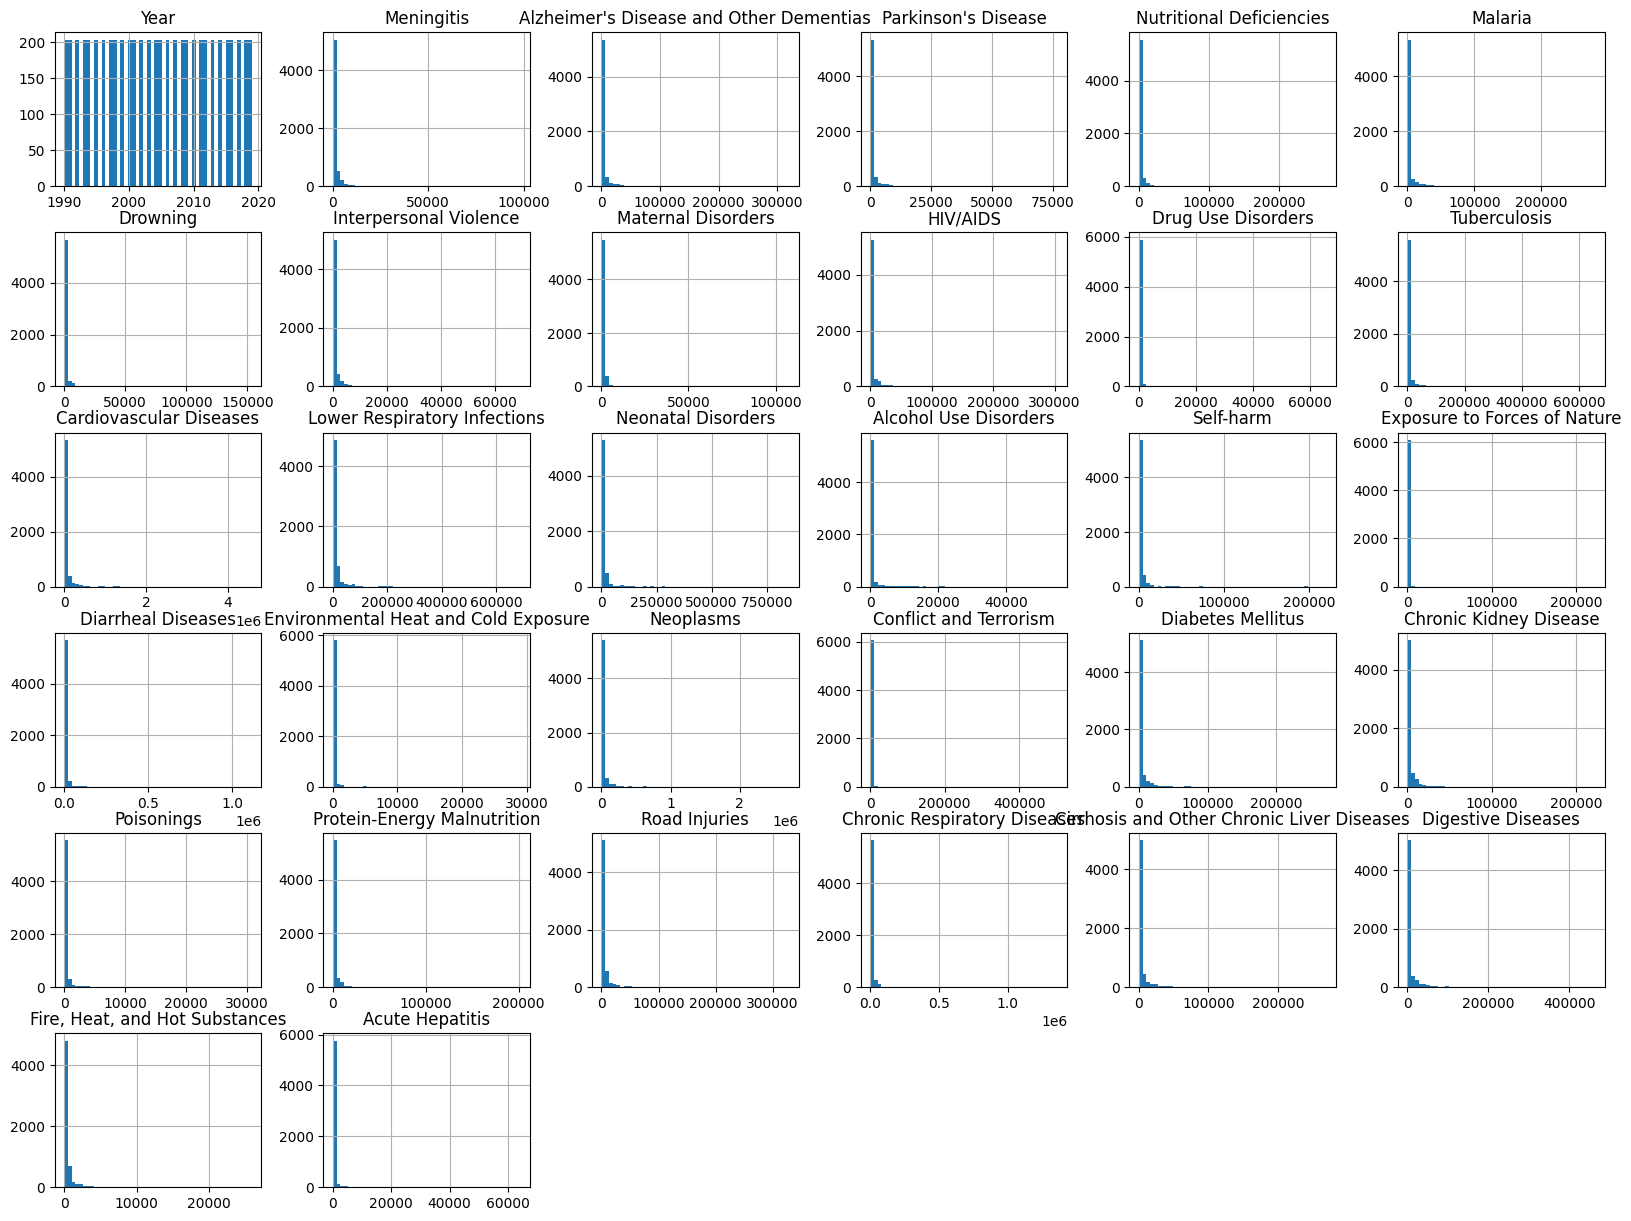

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins = 50, figsize=(20, 15))
plt.show()

  Country/Territory Code      Year  Meningitis  \
0       Afghanistan  AFG  7.596392    7.677864   
1       Afghanistan  AFG  7.596894    7.704812   
2       Afghanistan  AFG  7.597396    7.814400   
3       Afghanistan  AFG  7.597898    7.942007   
4       Afghanistan  AFG  7.598399    8.015658   

   Alzheimer's Disease and Other Dementias  Parkinson's Disease  \
0                                 7.018402             5.918894   
1                                 7.036148             5.926926   
2                                 7.058758             5.937536   
3                                 7.080026             5.953243   
4                                 7.100027             5.971262   

   Nutritional Deficiencies   Malaria  Drowning  Interpersonal Violence  ...  \
0                  7.643962  4.543295  7.223296                7.338888  ...   
1                  7.675082  5.247024  7.238497                7.601902  ...   
2                  7.800573  5.480639  7.323171         

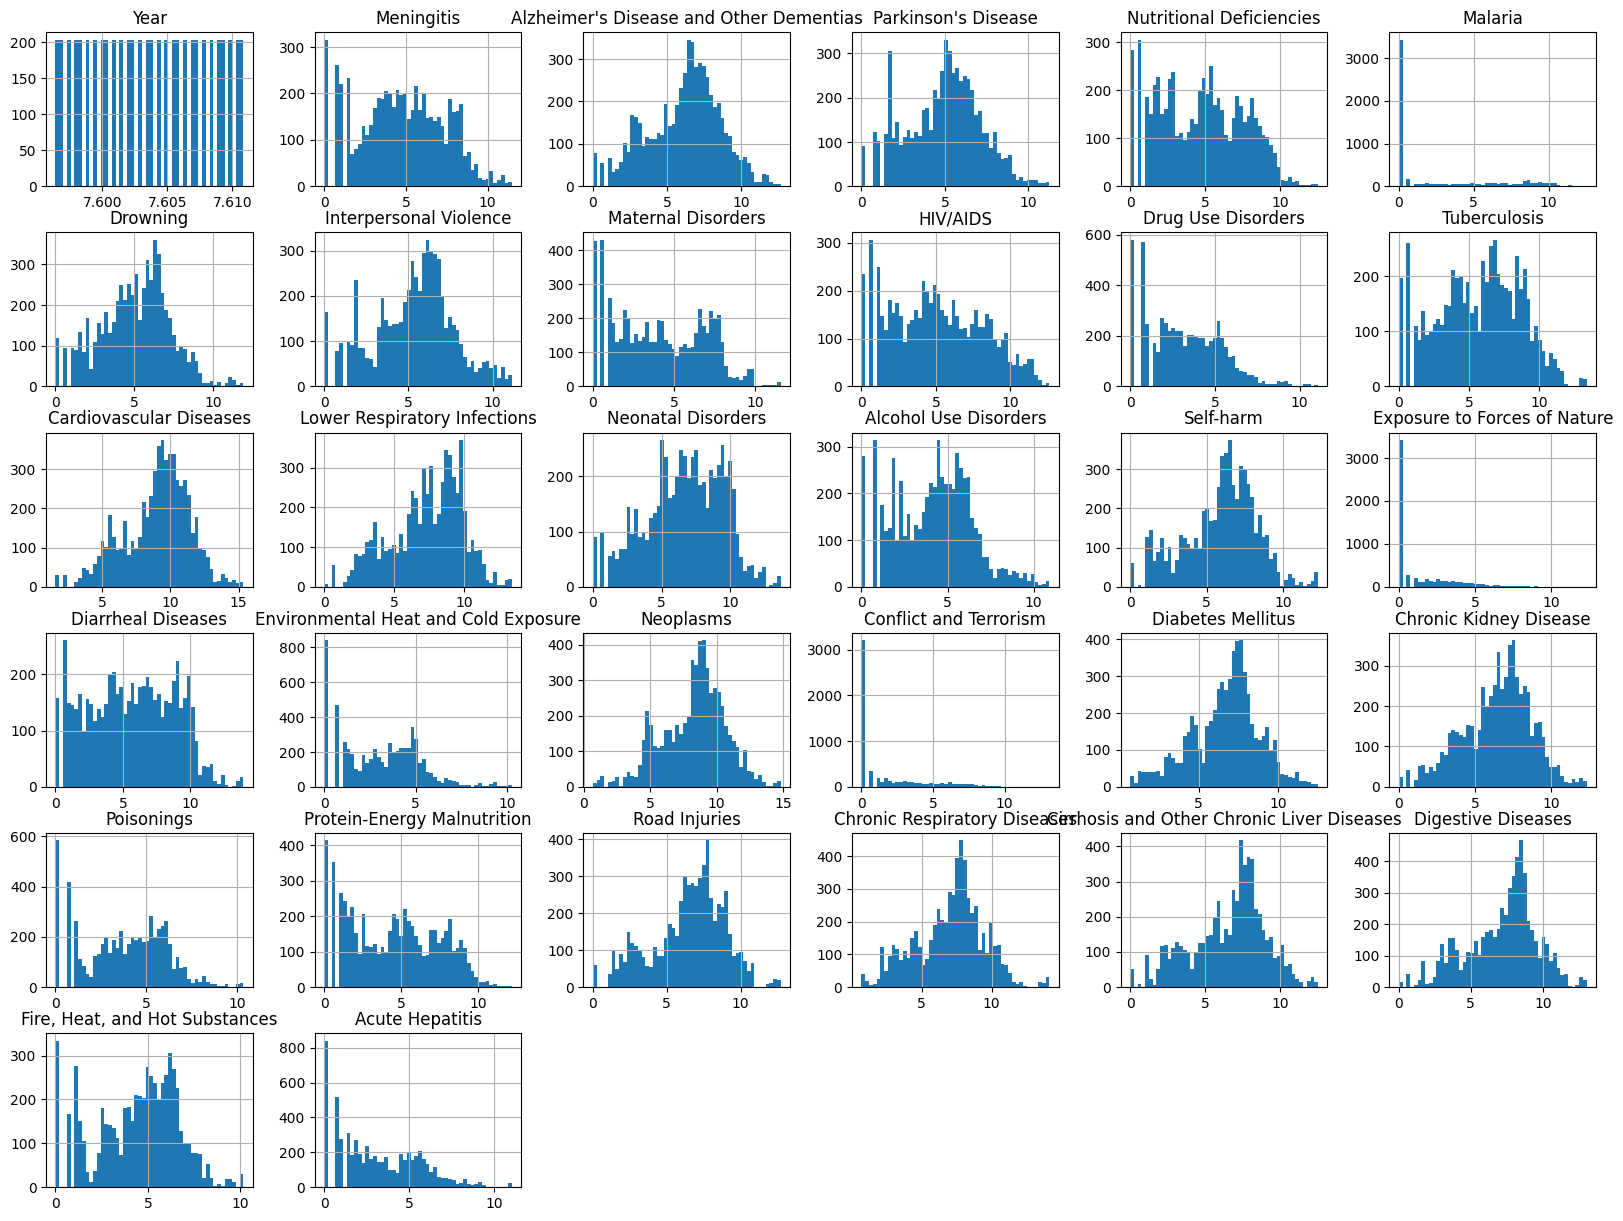

In [20]:
import numpy as np

# Applicare la trasformazione logaritmica a tutte le colonne numeriche
df_log_transformed = df.copy()
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_log_transformed[numeric_columns] = np.log1p(df[numeric_columns])

print(df_log_transformed.head())
# Plot histograms for the log-transformed numeric columns
df_log_transformed[numeric_columns].hist(bins=50, figsize=(20, 15))
plt.show()

In [22]:

# 3. Suddivisione tra colonne numeriche e non numeriche
numerical_cols = df.select_dtypes(include='number').columns.tolist()
categorical_cols = df.select_dtypes(exclude='number').columns.tolist()

print(f"\nColonne numeriche: {numerical_cols}")
print(f"Colonne categoriche: {categorical_cols}")


Colonne numeriche: ['Year', 'Meningitis', "Alzheimer's Disease and Other Dementias", "Parkinson's Disease", 'Nutritional Deficiencies', 'Malaria', 'Drowning', 'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS', 'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases', 'Lower Respiratory Infections', 'Neonatal Disorders', 'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature', 'Diarrheal Diseases', 'Environmental Heat and Cold Exposure', 'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus', 'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition', 'Road Injuries', 'Chronic Respiratory Diseases', 'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases', 'Fire, Heat, and Hot Substances', 'Acute Hepatitis']
Colonne categoriche: ['Country/Territory', 'Code']


In [23]:
# 4. Controllo valori nulli
print("\n>> Valori nulli per colonna:")
print(df.isnull().sum())


>> Valori nulli per colonna:
Country/Territory                             0
Code                                          0
Year                                          0
Meningitis                                    0
Alzheimer's Disease and Other Dementias       0
Parkinson's Disease                           0
Nutritional Deficiencies                      0
Malaria                                       0
Drowning                                      0
Interpersonal Violence                        0
Maternal Disorders                            0
HIV/AIDS                                      0
Drug Use Disorders                            0
Tuberculosis                                  0
Cardiovascular Diseases                       0
Lower Respiratory Infections                  0
Neonatal Disorders                            0
Alcohol Use Disorders                         0
Self-harm                                     0
Exposure to Forces of Nature                  0
Diarrheal 

In [24]:
# 5. Analisi di cardinalità delle categoriche
print("\n>> Cardinalità colonne categoriche:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} valori unici")


>> Cardinalità colonne categoriche:
Country/Territory: 204 valori unici
Code: 204 valori unici


In [26]:
# 6. Decisioni su cosa tenere o scartare
# Supponiamo di eliminare:
# - Codici Paese (ridondanti se abbiamo il nome)
# - Colonne costanti o con bassa varianza
columns_to_drop = []

# Esempio: se "Code" è solo un duplicato del nome del Paese, possiamo rimuoverlo
if 'Code' in df.columns and df['Code'].nunique() == df['Country/Territory'].nunique():
    columns_to_drop.append('Code')

# Colonne quasi costanti (bassa varianza)
low_variance_cols = [col for col in numerical_cols if df[col].std() < 0.01]
columns_to_drop.extend(low_variance_cols)

print(f"\n>> Colonne suggerite da eliminare: {columns_to_drop}")


>> Colonne suggerite da eliminare: ['Code']


In [ ]:
# 7. Nuovo dataframe pulito
df_clean = df.drop(columns=columns_to_drop)

# 8. Ricontrollo
print(f"\n>> Nuovo shape: {df_clean.shape}")
print(df_clean.head())



>> Nuovo shape: (6120, 33)
  Country/Territory  Year  Meningitis  \
0       Afghanistan  1990        2159   
1       Afghanistan  1991        2218   
2       Afghanistan  1992        2475   
3       Afghanistan  1993        2812   
4       Afghanistan  1994        3027   

   Alzheimer's Disease and Other Dementias  Parkinson's Disease  \
0                                     1116                  371   
1                                     1136                  374   
2                                     1162                  378   
3                                     1187                  384   
4                                     1211                  391   

   Nutritional Deficiencies  Malaria  Drowning  Interpersonal Violence  \
0                      2087       93      1370                    1538   
1                      2153      189      1391                    2001   
2                      2441      239      1514                    2299   
3                      283

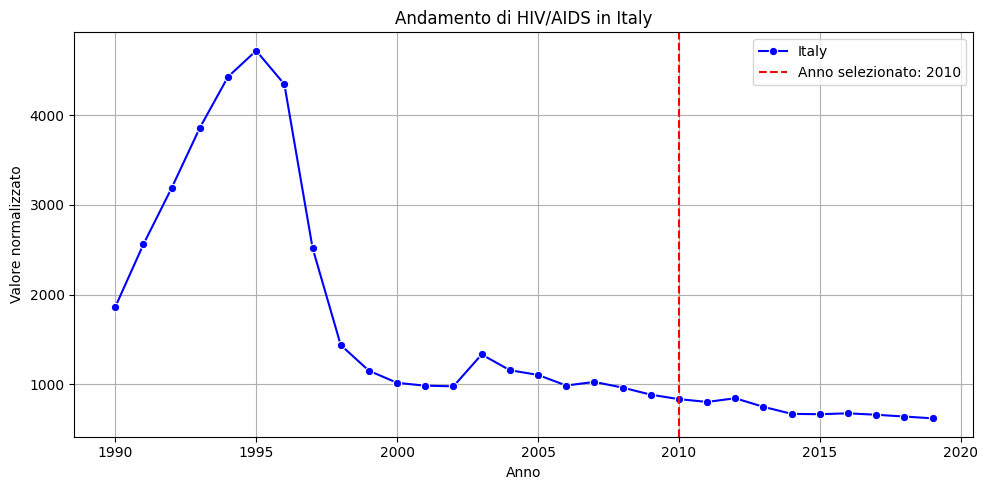

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
df = df_clean # Assicurati di usare il dataframe pulito

# ------------------------
# Seleziona qui i parametri
paese = 'Italy'
malattia = 'HIV/AIDS'
anno = 2010
# ------------------------

# Verifica che la colonna esista
if malattia not in df.columns:
    raise ValueError(f"La colonna '{malattia}' non è presente nel dataset.")

# Filtro dati
df_paese = df[df['Country/Territory'] == paese]

# Verifica che ci siano dati per il Paese
if df_paese.empty:
    raise ValueError(f"Nessun dato trovato per il paese '{paese}'.")

# Grafico: andamento della malattia nel tempo per il Paese selezionato
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_paese, x='Year', y=malattia, marker='o', color='blue', label=paese)

# Evidenzia l'anno selezionato
plt.axvline(x=anno, color='red', linestyle='--', label=f'Anno selezionato: {anno}')

# Titoli e labels
plt.title(f"Andamento di {malattia} in {paese}")
plt.xlabel("Anno")
plt.ylabel("Valore normalizzato")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

>> CLASSIFICATION REPORT:
                              precision    recall  f1-score   support

     Cardiovascular Diseases       0.98      0.99      0.99       910
      Conflict and Terrorism       0.00      0.00      0.00         1
          Diarrheal Diseases       0.92      0.91      0.91        53
Exposure to Forces of Nature       0.00      0.00      0.00         2
                    HIV/AIDS       0.97      0.97      0.97        98
Lower Respiratory Infections       1.00      0.88      0.94        25
                     Malaria       1.00      0.86      0.93        36
          Neonatal Disorders       0.76      0.92      0.83        24
                   Neoplasms       0.97      0.88      0.92        68
    Nutritional Deficiencies       1.00      1.00      1.00         5
                Tuberculosis       0.33      0.50      0.40         2

                    accuracy                           0.97      1224
                   macro avg       0.72      0.72      0.72   

/home/endershade/Desktop/Python_Course_Repo/.venv/lib64/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/endershade/Desktop/Python_Course_Repo/.venv/lib64/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/endershade/Desktop/Python_Course_Repo/.venv/lib64/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

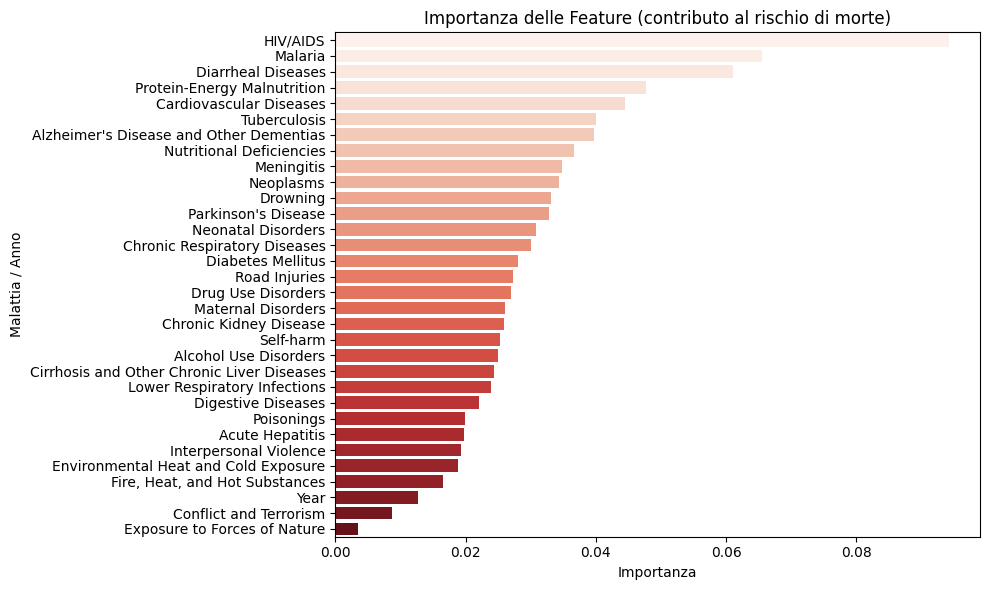

In [36]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Caricamento dati puliti
df = df_clean.copy()
# 2. Creazione target: causa con valore massimo tra le malattie
malattie = df.select_dtypes(include='number').columns.difference(['Year'])
df['most_likely_cause'] = df[malattie].idxmax(axis=1)

# 3. Feature matrix (X) e target (y)
X = df[['Year'] + list(malattie)]
y = df['most_likely_cause']

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Modello: Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Valutazione
y_pred = model.predict(X_test)
print(">> CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))

# 7. Importanza delle feature
importanze = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importanze, y=importanze.index, palette="Reds")
plt.title("Importanza delle Feature (contributo al rischio di morte)")
plt.xlabel("Importanza")
plt.ylabel("Malattia / Anno")
plt.tight_layout()
plt.show()
